In [ ]:
# Highlight this cell and click [Shift+Enter] to execute
print('This is just a simple print statement')

This is just a simple print statement


In [ ]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'restart': True, 'status': 'ok'}

In [ ]:
# load the MNIST data as training and validation sets
from tensorflow.keras.datasets import mnist
(x_train,y_train), (x_valid,y_valid)=mnist.load_data()
x_train=x_train.reshape(60000,784)
x_valid=x_valid.reshape(10000,784)

# normalize using maximum value of pixel
x_train=x_train/255
x_valid=x_valid/255

# Binary encode (one hot encoding) the outcomes. eg. 3 = [0 0 1 0 0 0 0 0 0 0]
import tensorflow.keras as keras 
y_train=keras.utils.to_categorical(y_train, 10)
y_valid=keras.utils.to_categorical(y_valid, 10)

# Import model libraries and create model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(784,)))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

# compile the model using loss function for back propagation, using adam as optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit data to model or trai the model
model.fit(x_train,y_train, validation_data=(x_valid, y_valid), epochs=5, verbose=2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 - 8s - loss: 0.1789 - accuracy: 0.9456 - val_loss: 0.1201 - val_accuracy: 0.9633
Epoch 2/5
1875/1875 - 5s - loss: 0.0797 - accuracy: 0.9748 - val_loss: 0.0847 - val_accuracy: 0.9746
Epoch 3/5
1875/1875 - 5s - loss: 0.0544 - accuracy: 0.9834 - val_loss: 0.0750 - val_accuracy: 0.9785
Epoch 4/5
1875/1875 - 5s - loss: 0.0425 - accuracy: 0.9864 - val_loss: 0.0827

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
# the data, split between train and validation sets
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

In [ ]:
x_train[0]

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
x_train.dtype

dtype('uint8')

In [ ]:
x_train.min()

0

In [ ]:
x_train.max()

255

In [ ]:
x_train[0]

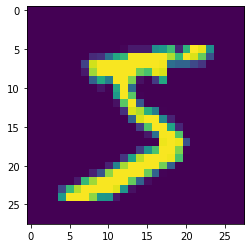

In [ ]:
import matplotlib.pyplot as plt
image=x_train[0]
plt.imshow(image)

In [ ]:
x_train=x_train.reshape(60000,784)

In [ ]:
x_valid = x_valid.reshape(10000,784)

In [ ]:
x_train=x_train/255

In [ ]:
x_valid=x_valid/255

In [ ]:
#cateogorical encoding, or binary encoding
import tensorflow.keras as keras
num_categories = 10

y_train=keras.utils.to_categorical(y_train, num_categories)
y_valid=keras.utils.to_categorical(y_valid, num_categories)

In [ ]:
from tensorflow.keras.models import Sequential
model = Sequential()

In [ ]:
from tensorflow.keras.layers import Dense

In [ ]:
model.add(Dense(units=512, activation='relu', input_shape=(784,)))

In [ ]:
model.add(Dense(units=512, activation='relu'))

In [ ]:
model.add(Dense(units=10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train, epochs=5, verbose=1, validation_data=(x_valid,y_valid))

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1897 - accuracy: 0.9435 - val_loss: 0.1107 - val_accuracy: 0.9686
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0991 - accuracy: 0.9738 - val_loss: 0.1192 - val_accuracy: 0.9720
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0821 - accuracy: 0.9809 - val_loss: 0.1484 - val_accuracy: 0.9698
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0694 - accuracy: 0.9832 - val_loss: 0.1215 - val_accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0628 - accuracy: 0.9856 - val_loss: 0.1467 - val_accuracy: 0.9795


In [ ]:
model.save("mymodel")

INFO:tensorflow:Assets written to: mymodel/assets


In [ ]:
from tensorflow import keras
import numpy as np
import pandas as pd

data=pd.read_csv('/content/sample_data/mnist_test.csv')
model= keras.models.load_model("mymodel")

In [ ]:
y_train=data['7']
del data['7']

In [ ]:
x_train=data.values

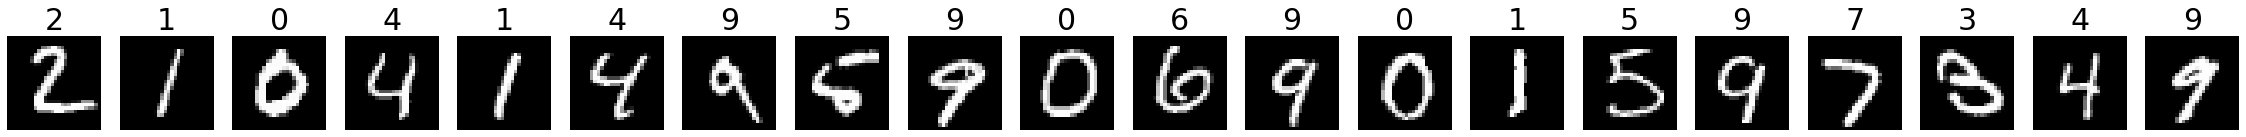

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))

num_images=20
for i in range(num_images):
  row=x_train[i]
  label=y_train[i]

  image=row.reshape(28,28)
  plt.subplot(1, num_images, i+1)
  plt.title(label, fontdict={'fontsize':30})
  plt.axis('off')
  plt.imshow(image, cmap='gray')

In [ ]:
image=x_train[100]
image=image.reshape(1,784)
prediction=model.predict(image)
prediction=np.argmax(prediction)
prediction

0

Text(0.5, 1.0, '0')

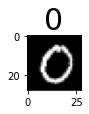

In [ ]:
image=image.reshape(28,28)
plt.figure(figsize=(1,1))
plt.imshow(image,cmap='gray')
plt.title(prediction, fontdict={'fontsize':30})

In [ ]:
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

m = 5.8  # -2 to start, change me please
b = 10  # 40 to start, change me please

# Sample data
x = np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9])
y = np.array([10, 20, 25, 30, 40, 45, 40, 50, 60, 55])
y_hat = x * m + b

plt.plot(x, y, '.')
plt.plot(x, y_hat, '-')
plt.show()

print("Loss:", np.sum((y - y_hat)**2)/len(x))

In [ ]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import pandas as pd

data=pd.read_csv('/content/sample_data/mnist_test.csv')
data.head()

In [ ]:
x_data=data.iloc[:,1:785]

In [ ]:
y_data=data.iloc[:,0]

In [ ]:
x_data=x_data.values

In [ ]:
y_data=y_data.values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid=train_test_split(x_data, y_data, test_size=0.33, random_state=7)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)  

(6699, 784)
(6699,)
(3300, 784)
(3300,)


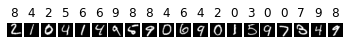

In [ ]:
import matplotlib.pyplot as plt

for i in range(20):
  image=x_data[i]
  label=y_train[i]

  image=image.reshape(28,28)
  plt.subplot(1,20,i+1)
  plt.title(label)
  plt.axis('off')
  plt.imshow(image, cmap='gray')

In [ ]:
x_train=x_train/255
x_valid=x_valid/255

In [ ]:
import tensorflow.keras as keras
num_classes=10
y_train=keras.utils.to_categorical(y_train, num_classes)
y_valid=keras.utils.to_categorical(y_valid, num_classes)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()

model.add(Dense(units=512, activation='relu', input_shape=(784,)))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10, verbose=1, validation_data=(x_valid,y_valid))

Epoch 1/10
210/210 [==============================] - 3s 9ms/step - loss: 0.4295 - accuracy: 0.8665 - val_loss: 0.2358 - val_accuracy: 0.9282
Epoch 2/10
210/210 [==============================] - 2s 9ms/step - loss: 0.1493 - accuracy: 0.9536 - val_loss: 0.1713 - val_accuracy: 0.9436
Epoch 3/10
210/210 [==============================] - 2s 9ms/step - loss: 0.0718 - accuracy: 0.9766 - val_loss: 0.1614 - val_accuracy: 0.9512
Epoch 4/10
210/210 [==============================] - 2s 9ms/step - loss: 0.0515 - accuracy: 0.9828 - val_loss: 0.1883 - val_accuracy: 0.9491
Epoch 5/10
210/210 [==============================] - 2s 9ms/step - loss: 0.0316 - accuracy: 0.9888 - val_loss: 0.1769 - val_accuracy: 0.9582
Epoch 6/10
210/210 [==============================] - 2s 9ms/step - loss: 0.0211 - accuracy: 0.9931 - val_loss: 0.1930 - val_accuracy: 0.9548
Epoch 7/10
210/210 [==============================] - 2s 9ms/step - loss: 0.0211 - accuracy: 0.9942 - val_loss: 0.1983 - val_accuracy: 0.9555
Epoch 

In [ ]:
check=x_train[1]
check=check.reshape(1,784)
check.shape

(1, 784)

Text(0.5, 1.0, '4')

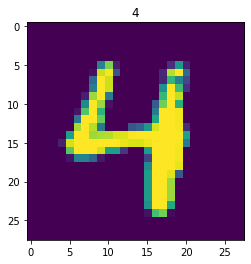

In [ ]:
import numpy as  np
label=np.argmax(model.predict(check))

image=check.reshape(28,28)
plt.imshow(image)
plt.title(label)